In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **SEGMENTATION**



Une segmentation d’image est une partition de l’image en ensembles de pixels homogènes (selon un critère pré-défini).

> <b><h4 style="color:red;">Segmentation par niveaux de gris </h4></b>

-> Utilisation de l’histogramme

> <b><h4 style="color:MediumSeaGreen;">Segmentation par couleurs</h4></b>

-> Utilisation des informations des 3 images R, G, B

> <b><h4 style="color:MediumSeaGreen;">Segmentation par texture </h4></b>

-> Utilisation du contenu fréquentiel de
l’image.

> <b><h4 style="color:MediumSeaGreen;">Segmentation par contours </h4></b>

-> Approche frontière : recherche des pixels dissemblables → contours entre les zones homogènes.







> ###  **1. Appliquer la méthode de Cluserting**






Principe des méthodes de clustering : regrouper les vecteurs en groupes homogénes.
<ul>
  <li>Pic de l’histogramme  composante
image.</li>
  <li>Découper l’histogramme en k classes.</li>
  <li>Etiqueter chaque pixel avec le numéro de
sa classe.</li>
</ul>

### ***1.1 openCv***
Les algorithmes d’OpenCV permettent d’appliquer divers traitements sur les images pour faciliter la détection d’éléments précis dans celles-ci.
<ul>
  <li>Tresholding (seuillage)</li>
  <li>Les filtres de détection de contours</li>
  <li>Les filtres de lissage</li>
  <li>Les filtres morphologiques</li>
</ul>


In [14]:
!pip install opencv-python

### **1.2 Exemple de classification : K-MEANS**

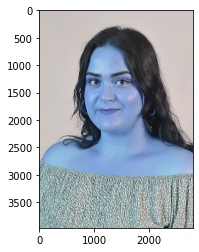

In [24]:
import skimage.io
import matplotlib.pyplot as plt
import numpy as np 
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io

image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/13-9-2021.jpg')
(h1, w1) = image.shape[:2]
plt.imshow(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 5)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/souha2.jpg', quant)

plt.imshow(image)

cv2.imread('/content/drive/MyDrive/Colab Notebooks/13-9-2021.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()



> ### **2. Les algorithmes de bruitage**












### **1. Appliquer un filtre**



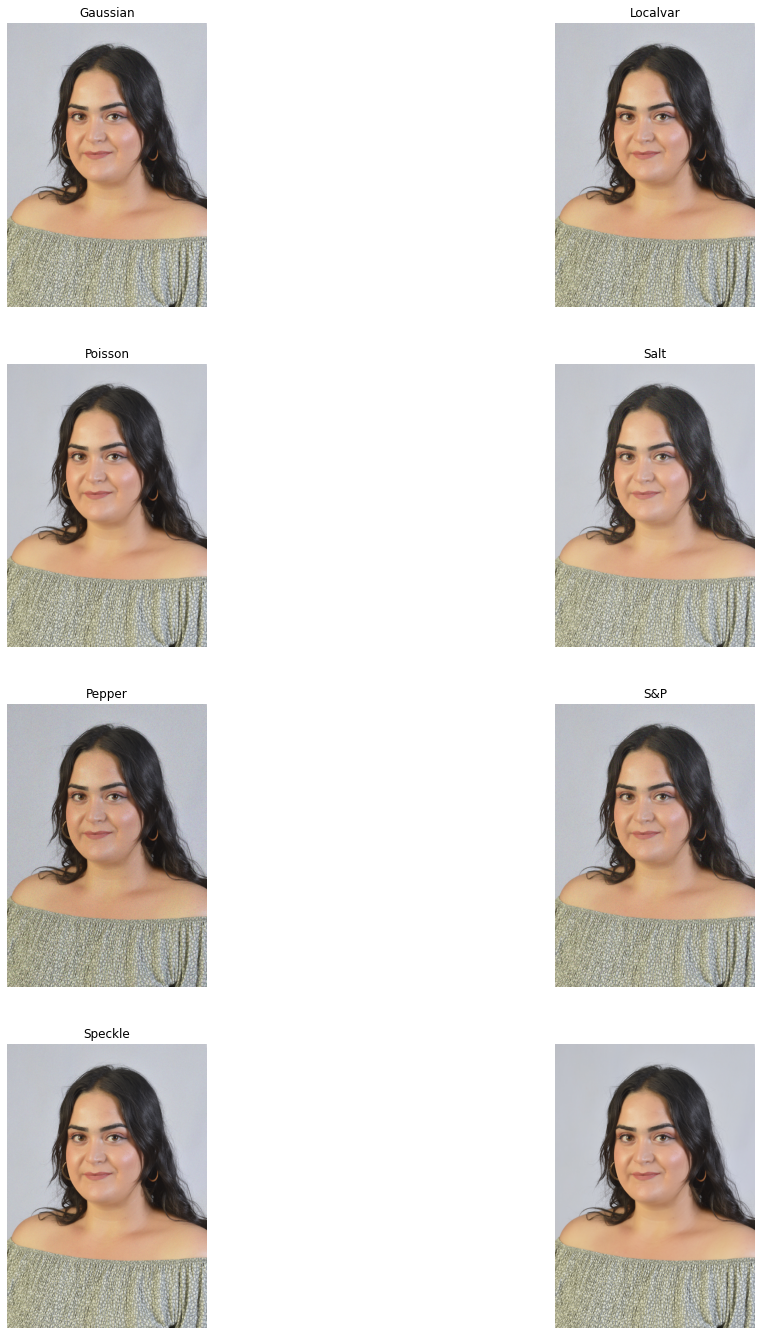

In [25]:
import skimage.io
import matplotlib.pyplot as plt
img = skimage.io.imread('/content/drive/MyDrive/Colab Notebooks/13-9-2021.jpg')/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "Gaussian", r,c,1)
plotnoise(img, "Localvar", r,c,2)
plotnoise(img, "Poisson", r,c,3)
plotnoise(img, "Salt", r,c,4)
plotnoise(img, "Pepper", r,c,5)
plotnoise(img, "S&P", r,c,6)
plotnoise(img, "Speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()